<h1 style="text-align: center;">Data Clustering Analysis</h1>

#### Autor: Edin Del Valle


<h1 style="text-align: center;">Introducción</h1>

El clustering es un método de agrupamiento de clientes o conjuntos de datos que consiste en dividirlos en grupos homogéneos, donde los elementos dentro de cada conjunto son más similares entre sí en comparación con aquellos de diferentes grupos. Es útil en el análisis de datos para identificar relaciones y patrones, tanto en el área de marketing, para mejorar las estrategias, como en la optimización de recursos según sea el análisis. Los datos de este análisis provienen de Kaggle, Dev Sharma.(2021) de un centro comercial de supermercados. 

El objetivo es identificar a los clientes mediante un análisis descriptivo, análisis de correlación, análisis de clustering y finalmente la evaluación de la calidad del clustering utilizando tres variables: Edad, Renta (Ingresos) y Tamaño de la Ciudad. Estas tres variables fueron elegidas debido a su impacto directo en el comportamiento de compra y el estilo de vida de los clientes. Solo se necesita analizar si en los clientes influyen la edad y el tamaño de la ciudad respecto a sus ingresos. Aspectos clave para definir estrategias de marketing y planificación comercial. 

Esto nos permite reconocer a los clientes para una mejor ubicación geográfica y promoción. Se aplicarán las siguientes técnicas de clustering: K-means, evaluando el número de clusters con el método del codo y el coeficiente de silueta para determinar la cantidad óptima.

# Objetivo General

Segmentar a los clientes del supermercado mediante técnicas de clustering basadas en características y socioeconómicas, para identificar grupos y optimizar la toma de desiciones y planificación comercial.

-   Realizar un analisis descriptivo de las variables para entender la distribución de los datos y detectar los patrones iniciales.

-   Seleccionar las variables mas relevantes que representen el comportamiento socioeconómico de los clientes.

-   Aplicar técnicas de clustering, como K-means y evaluar el número óptimo de clústeres mediante el método de codo y el coeficiente de silhouette.

In [2]:
# Cargar bibliotecas necesarias para el análisis
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(gridExtra))

library(readxl)
library(dplyr)
library(ggplot2)
library(cluster)
library(factoextra)
library(gridExtra)
library(knitr)

In [3]:
# Cargar el dataset
data <- read_excel("~/Rstudio/Proyectos/Customer_Data.xlsx")
# Mostrar las primeras filas del conjunto de datos
kable(head(data, 5), format = "pandoc", align = "c")



  ID      Sex    Marital status    Age    Education    Income    Occupation    Settlement size 
-------  -----  ----------------  -----  -----------  --------  ------------  -----------------
 1e+08     0           0           67         2        124670        1                2        
 1e+08     1           1           22         1        150773        1                2        
 1e+08     0           0           49         1        89210         0                0        
 1e+08     0           0           45         1        171565        1                1        
 1e+08     0           0           53         1        149031        1                1        

# 1. Análisis Descriptivo de Datos

## 1.1. Medidas de Tendencia Central

In [4]:
# Calcular la media
mean_income <- mean(data$Income, na.rm = TRUE)
mean_age <- mean(data$Age, na.rm = TRUE)
mean_settlement <- mean(data$`Settlement size`, na.rm = TRUE)

# Calcular la mediana
median_income <- median(data$Income, na.rm = TRUE)
median_age <- median(data$Age, na.rm = TRUE)
median_settlement <- median(data$`Settlement size`, na.rm = TRUE)

# Función para evaluar la moda más frecuente
calcular_moda <- function(x) {
  modas <- as.numeric(names(table(x))[table(x) == max(table(x))])
  return(modas[1])  # Devuelve solo la primera moda si hay varias
}

# Calcular la moda
mode_income <- calcular_moda(data$Income)
mode_age <- calcular_moda(data$Age)
mode_settlement <- calcular_moda(data$`Settlement size`)

# Crear una tabla con los resultados
tendencia_central <- data.frame(
  Variable = c("Income", "Age", "Settlement size"),
  Media = c(mean_income, mean_age, mean_settlement),
  Mediana = c(median_income, median_age, median_settlement),
  Moda = c(mode_income, mode_age, mode_settlement)
)

# Imprimir la tabla de resultados
kable(tendencia_central)



|Variable        |      Media|  Mediana|  Moda|
|:---------------|----------:|--------:|-----:|
|Income          | 120954.419| 115548.5| 69487|
|Age             |     35.909|     33.0|    26|
|Settlement size |      0.739|      1.0|     0|

Los datos proporcionados muestran información sobre ingresos, edad y tamaño de la ciudad. Se calcularon estadísticas descriptivas que proporcionan una visión valiosa de este proyecto. El ingreso promedio es de 120,954.42, con una mediana de 115,548.50 y una moda de 69,487. Esto sugiere que, aunque el ingreso promedio es alto, la mayoría de las personas ganan de 69,487 indicando una posible distribución sesgada hacia ingresos más altos. 

La edad promedio es de 36 años, con una mediana de 33 años y una moda de 26 años, lo que indica una población mayoritariamente de jóvenes adultos. El tamaño de la ciudad tiene un promedio de 0.739, una mediana de 1 y una moda de 0, sugiriendo que la mayoría vive en áreas más pequeñas ciudades. Estos datos ofrecen una visión general de las características demográficas y económicas de la muestra.

## 1.2. Medidas de dispersión

In [5]:
# Calcular la desviación estándar, rango intercuartílico y varianza
sd_income <- sd(data$Income, na.rm = TRUE)
iqr_income <- IQR(data$Income, na.rm = TRUE)
var_income <- var(data$Income, na.rm = TRUE)

sd_age <- sd(data$Age, na.rm = TRUE)
iqr_age <- IQR(data$Age, na.rm = TRUE)
var_age <- var(data$Age, na.rm = TRUE)

sd_settlement <- sd(data$`Settlement size`, na.rm = TRUE)
iqr_settlement <- IQR(data$`Settlement size`, na.rm = TRUE)
var_settlement <- var(data$`Settlement size`, na.rm = TRUE)

# Crear data frame para mostrar los resultados
dispersion <- data.frame(
  Variable = c("Income", "Age", "Settlement size"),
  SD = c(sd_income, sd_age, sd_settlement),
  IQR = c(iqr_income, iqr_age, iqr_settlement),
  Variance = c(var_income, var_age, var_settlement)
)
# Mostrar resultados
kable(dispersion)



|Variable        |           SD|   IQR|     Variance|
|:---------------|------------:|-----:|------------:|
|Income          | 3.810882e+04| 40409| 1.452283e+09|
|Age             | 1.171940e+01|    15| 1.373444e+02|
|Settlement size | 8.125325e-01|     1| 6.602091e-01|

Los ingresos de los clientes son bastante variables, con diferencias grandes entre unos y otros. La desviación estándar es de 3.81 y el rango intercuartílico de 40,409 lo que nos dice que los ingresos están muy dispersos. En cambio, la edad tiene menos variación, con una desviación estándar de 11.72 y un rango de 15 años, que confirma que el análisis corresponde a jóvenes adultos. 

Por último, el tamaño de la ciudad donde viven los clientes es bastante similar entre ellos, ya que la desviación estándar es de 0.81 y el rango es de 1, lo que indica que la mayoría vive en ciudades de tamaños parecidos.

## 1.3. Visualización de Distribuciones

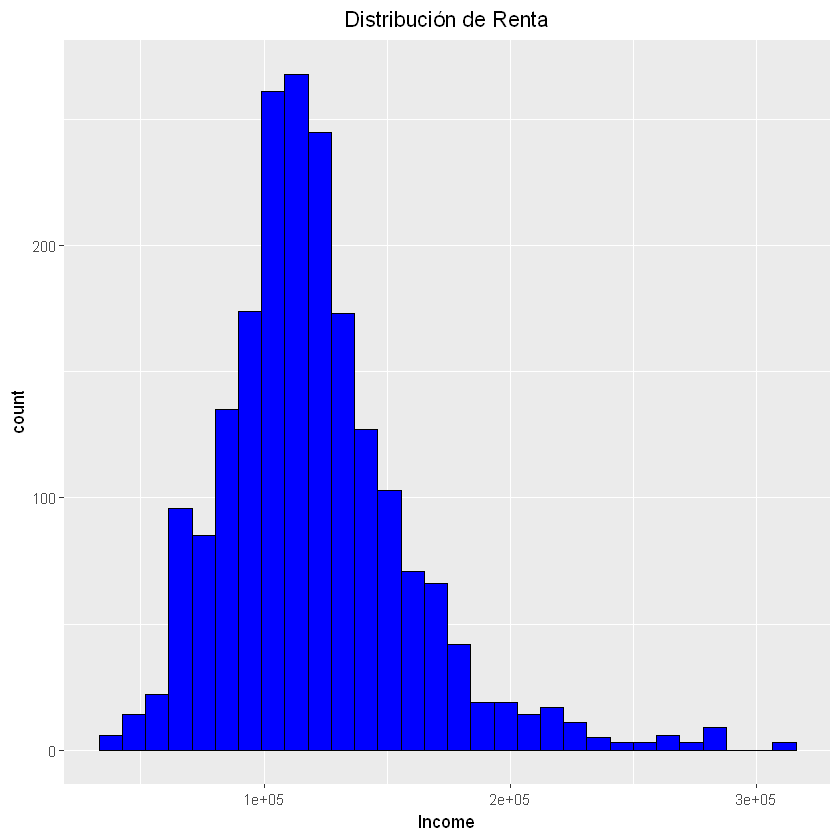

In [6]:
# Crear un histograma de la distribución de la renta
ggplot(data, aes(x = Income)) + 
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  ggtitle("Distribución de Renta")+
  theme(plot.title = element_text(hjust =0.5))

La gráfica de histograma tiene una forma de campana, pero está ligeramente sesgada a la derecha. Esto sugiere que hay una menor cantidad de personas con ingresos muy altos. Cada barra representa la frecuencia de ingresos dentro de un rango específico. Las barras más altas indican que más personas se encuentran en ese rango de ingresos.

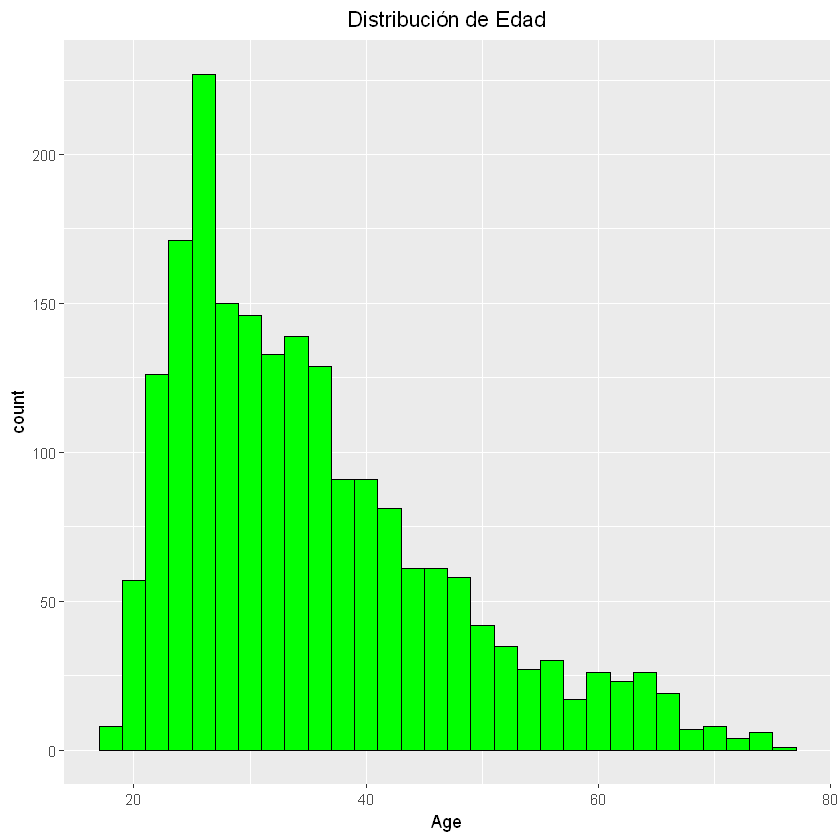

In [7]:
# Crear un histograma de la distribución de la edad
ggplot(data, aes(x = Age)) + 
  geom_histogram(bins = 30, fill = "green", color = "black") +
  ggtitle("Distribución de Edad")+
  theme(plot.title = element_text(hjust =0.5))

El histograma explica que la mayor concentración de los datos se encuentra en el rango de Age de 20 a 30 años. A medida que la edad aumenta, la frecuencia de personas en rangos de edad superiores disminuye, lo que indica que hay una cantidad menor de personas o clientes en los rangos de edad más altos. Es útil para entender la distribución de edades dentro de un grupo específico, lo que puede ser relevante para estudios demográficos, planificación de servicios, marketing, etc.

Además esta información permite orientar las estrategias de marketing y publicidad hacia los grupos de edad más relevantes, adaptando los mensajes y productos a las preferencias de cada segmento de edad. Por ejemplo, los productos dirigidos a jóvenes adultos pueden enfocarse en la tecnología y la moda, mientras que los productos para adultos mayores pueden centrarse en la salud y el bienestar.

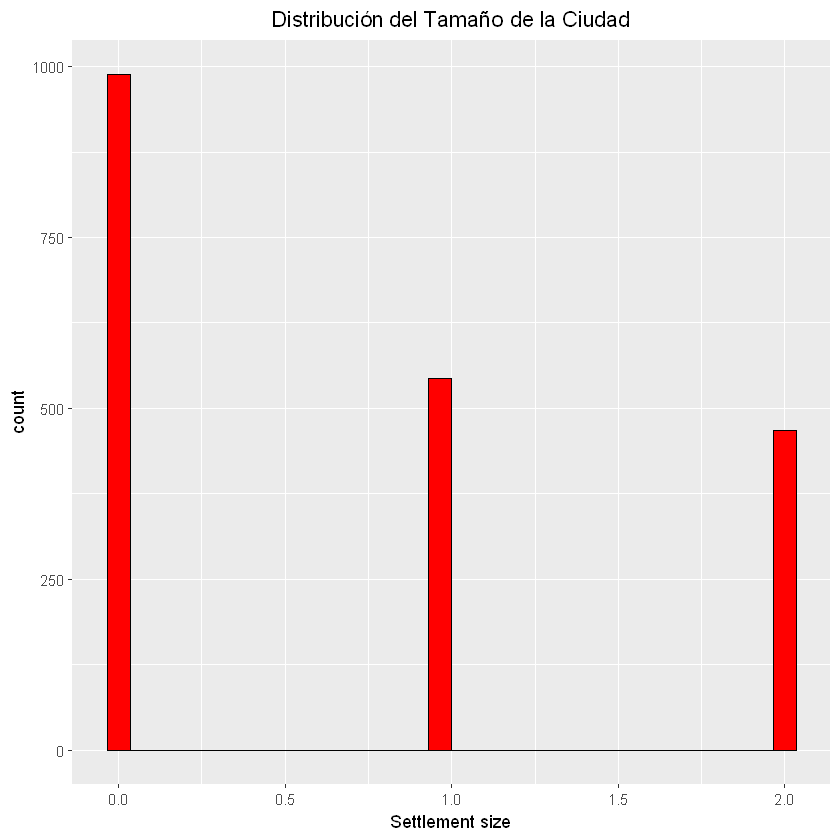

In [8]:
# Crear un histograma de la distribución del tamaño de la ciudad
ggplot(data, aes(x = `Settlement size`)) + 
  geom_histogram(bins = 30, fill = "red", color = "black") +
  ggtitle("Distribución del Tamaño de la Ciudad")+
  theme(plot.title = element_text(hjust =0.5))

La gráfica muestra que hay muchas ciudades pequeñas, seguidas de ciudades medianas, pero pocas ciudades grandes. Las barras más altas representan la cantidad de ciudades pequeñas, mientras que la barra más baja representa la cantidad de ciudades grandes. Esto ayuda a entender cómo están distribuidos los clientes.

### 1.3.2. Boxplots

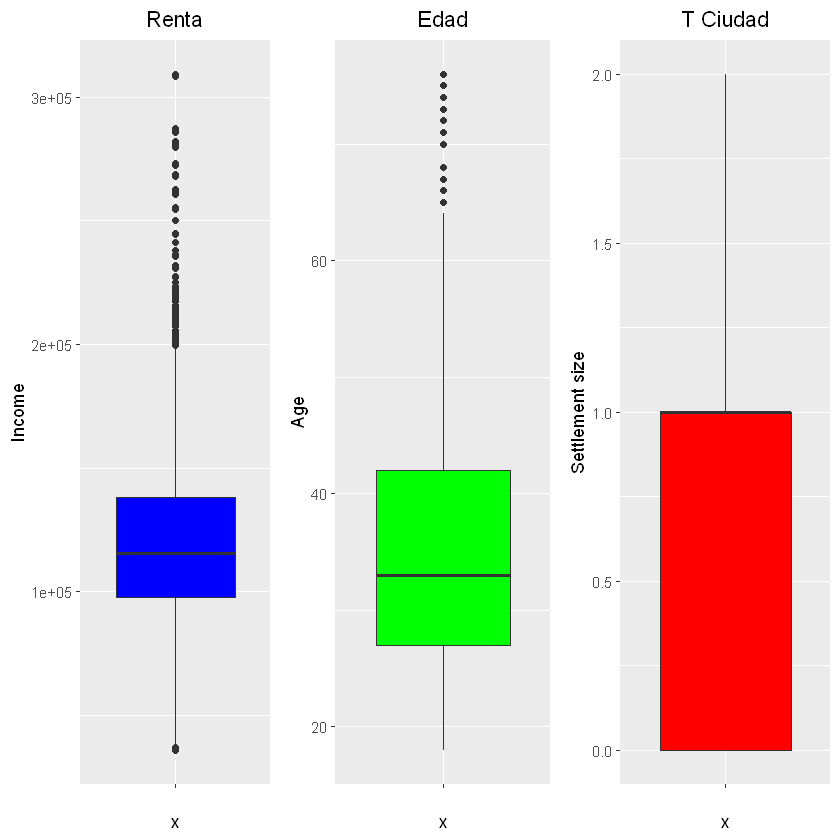

In [9]:
# Crear boxplots para las variables de renta, edad y tamaño de la ciudad
boxplot_income <- ggplot(data, aes(x = "", y = Income)) + 
  geom_boxplot(fill = "blue") +
  ggtitle("Renta") +
  theme(plot.title = element_text(hjust = 0.5))

boxplot_age <- ggplot(data, aes(x = "", y = Age)) + 
  geom_boxplot(fill = "green") +
  ggtitle("Edad") +
  theme(plot.title = element_text(hjust = 0.5))

boxplot_settlement <- ggplot(data, aes(x = "", y = `Settlement size`)) + 
  geom_boxplot(fill = "red") +
  ggtitle("T Ciudad") +
  theme(plot.title = element_text(hjust = 0.5))

# Organizar y mostrar los boxplots en una única visualización
grid.arrange(boxplot_income, boxplot_age, boxplot_settlement, ncol = 3)

Las tres gráficas muestran cómo se distribuyen los ingresos, la edad y el tamaño de las ciudades entre las personas o clientes. La línea dentro de la caja representa la mediana, es decir, el punto donde la mitad de los clientes ganan más y la otra mitad gana menos. De manera similar, la línea en la gráfica de edad muestra la edad mediana. En la gráfica de tamaño de la ciudad, la ausencia de una línea de mediana sugiere que se están utilizando valores discretos, como pequeña, mediana y grande. 

La caja en sí muestra el rango donde se encuentra el 50% central de los ingresos y edades, lo que nos indica la variabilidad de cada una de las variables analizadas. Los puntos fuera de los bigotes son ingresos, edades o tamaños de ciudades que se consideran inusualmente altos o bajos, conocidos como valores atípicos.

# 2. Análisis de Correlación

In [10]:
# Calcular y mostrar la matriz de correlación para las variables
cor_matrix <- cor(data[, c("Income", "Age", "Settlement size")], 
                  use = "complete.obs")

kable(cor_matrix)



|                |    Income|       Age| Settlement size|
|:---------------|---------:|---------:|---------------:|
|Income          | 1.0000000| 0.3406102|       0.4908809|
|Age             | 0.3406102| 1.0000000|       0.1197513|
|Settlement size | 0.4908809| 0.1197513|       1.0000000|

Las correlaciones entre las variables clave revelan algunos patrones interesantes. Income y Age presentan una correlación positiva moderada (0.34), esto sugiere que a medida aumenta la edad, también lo hace el ingreso, pero en una relacion tan fuerte.

Income y Settlement size muestran una correlación más alta (0.49), lo que indica que las personas que viven en ciudades más grandes tienden a tener mayores ingresos. Finalmente, Age y Settlement size tienen una correlación débil (0.12), lo que sugiere que la edad no está fuertemente relacionada con el tamaño de la ciudad.

Es importante de tener en cuenta que la edad y el tamaño de la ciudad no son los único factores que influyen en los ingresos, ya que hay otros factores como la educación y la experiencia laboral también juegan un papel importante. Este análisis de correlación puede orientar la estrategia de mercado, pero antes de tomar desiciones es importante de analizar otros factores que puedan influir en los ingresos de los clientes.

# 3. Selección y Preparación de Variables para Clustering

In [11]:
#Normalización de las variables Income, Age y Settlement size
data_normalized <- data %>%
  select(Income, Age, `Settlement size`) %>%
  scale()

# Convertir a un data frame
data_normalized <- as.data.frame(data_normalized)

Antes de ejecutar el algoritmo de clustering, las variables Ingreso, Edad y Tamaño de Ciudad fueron normalizadas utilizando el método z-score mediante la función scale() en R. Este paso fue necesario porque dichas variables presentan escalas muy diferentes. Por ejemplo, los ingresos tienen un rango considerablemente mayor en comparación con la edad o el tamaño de la ciudad. 

Si no se hubiera aplicado la normalización, el algoritmo K-means habría otorgado más peso al ingreso, distorsionando así la formación de los clusters. Al normalizar con scale(), se garantiza que todas las variables tengan la misma relevancia en el análisis, ya que esta función ajusta los datos para que tengan una media de 0 y una desviación estándar de 1.

# 4. Analisis de Clustering

In [12]:
# Fija semilla para reproducibilidad
set.seed(123)

# Ejecuta K-Means con 3 clústeres
kmeans_result <- kmeans(data_normalized, centers = 3, nstart = 25)

# Añade clúster al dataset
data$Cluster <- kmeans_result$cluster

## 4.1. Determinación del Número Óptimo de Clústeres

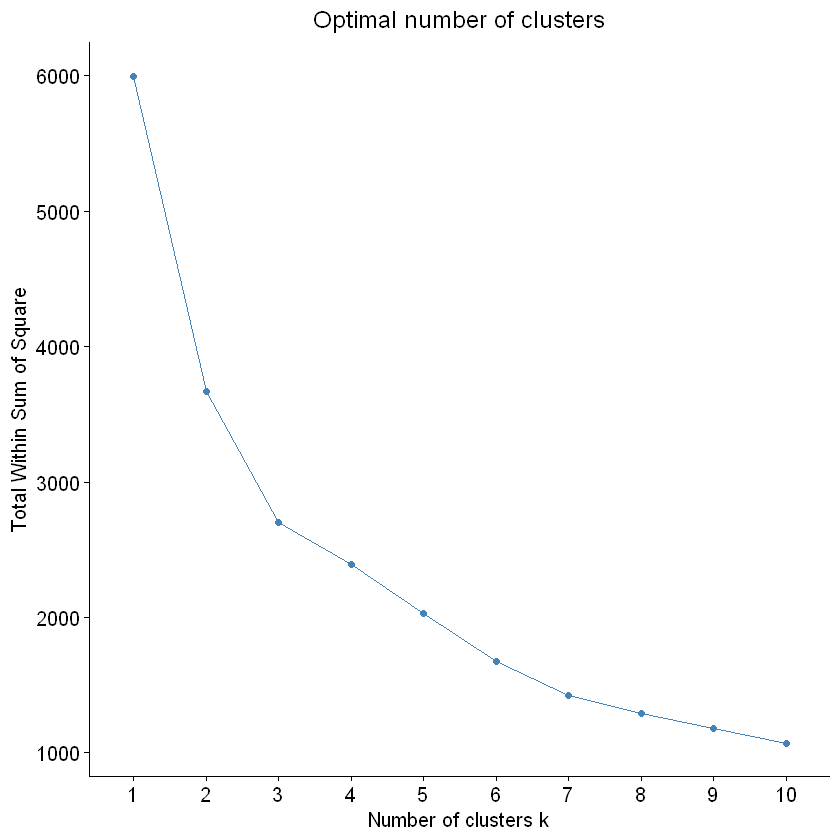

In [13]:
# Generar grafica de método del codo
fviz_nbclust(data_normalized, kmeans, method = "wss")+
   theme(plot.title = element_text(hjust =0.5))

El gráfico del método del codo sugiere que el número óptimo de clústeres es tres, ya que a partir de este punto la disminución en la suma de las distancias cuadradas dentro de los clústeres es menos significativa. Esto indica que agregar más grupos no aportaría mejoras notables en la segmentación.

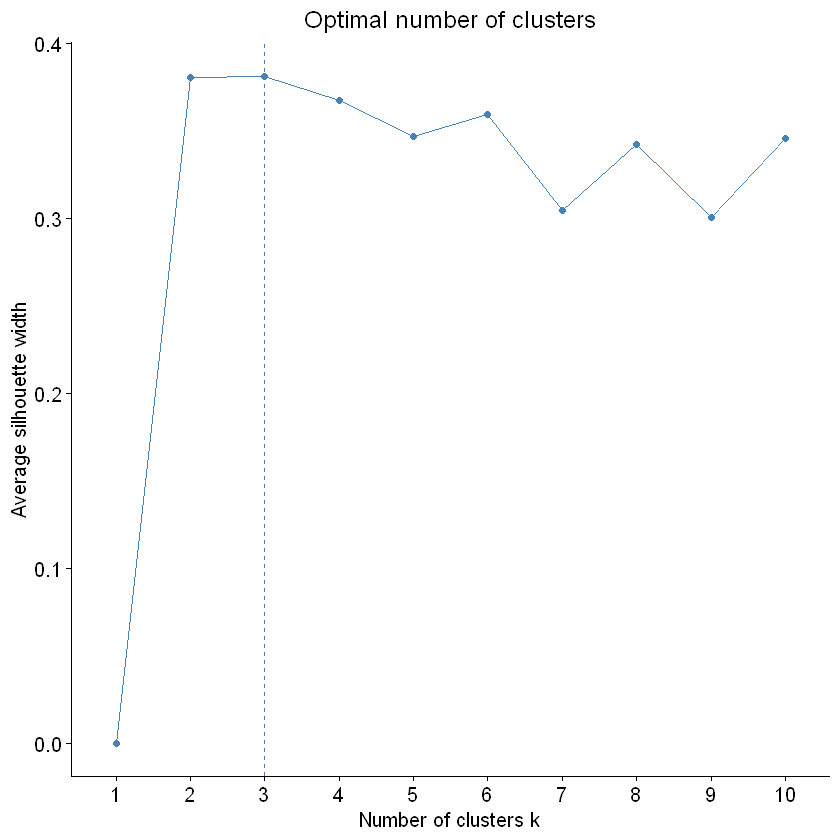

In [14]:
# Calcula el número óptimo de clústeres con el método Silhouette
fviz_nbclust(data_normalized, kmeans, method = "silhouette")+
   theme(plot.title = element_text(hjust =0.5))

El método de `Silhouette` confirma este resultado, mostrando que tres clústeres proporcionan la mejor definición de los grupos, con una estructura clara entre los diferentes segmentos de clientes.

## 4.2. Visualización de los clústeres

 # Mostrar los clústeres resultantes del análisis K-Means
  fviz_cluster(kmeans_result, data = data_normalized)+
     theme(plot.title = element_text(hjust =0.5))

In [15]:
# Resumir estadísticas por clúster
cluster_summary <- data %>%
  group_by(Cluster) %>%
  summarise(
    mean_income = mean(Income, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE),
    mean_settlement = mean(`Settlement size`, na.rm = TRUE)
  )

# Mostrar resumen en tabla
kable(cluster_summary)



| Cluster| mean_income| mean_age| mean_settlement|
|-------:|-----------:|--------:|---------------:|
|       1|    98262.97| 32.33370|       0.0032823|
|       2|   158485.37| 54.30400|       1.1333333|
|       3|   130329.78| 30.80309|       1.4767932|

La gráfica muestra los resultados del análisis de clústeres K-means, con tres clústeres distintitos representados por tres colores. El clúster 1, representa el color rojo con un ingreso promedio 98262.97 y Edad promedio de 33 años aproximadamente que representa a los clientes jovenes con ingresos equilibrado y que viven en tamaño de ciudad pequeño. El color verde representa con un ingreso de 158485.37 y edad promedio 55 años que agrupa los clientes mayores y con ingresos altos y se residen en la ciudad tamaño medio. Por ultimo el color azul que tienen un ingresos 130329.78, Edad promedio 30.80309 incluye a clientes jovenes con ingresos aproximadamente altos y que vive en la ciudad más grande.

Un hallazgo importante es la correlación entre el nivel de ingresos y el tamaño de la ciudad donde residen los clientes. Observamos que, en general, a mayor tamaño de la ciudad, mayores son los ingresos, lo cual sugiere que la urbanización puede estar más fuertemente relacionada con los ingresos que con la edad de los clientes.

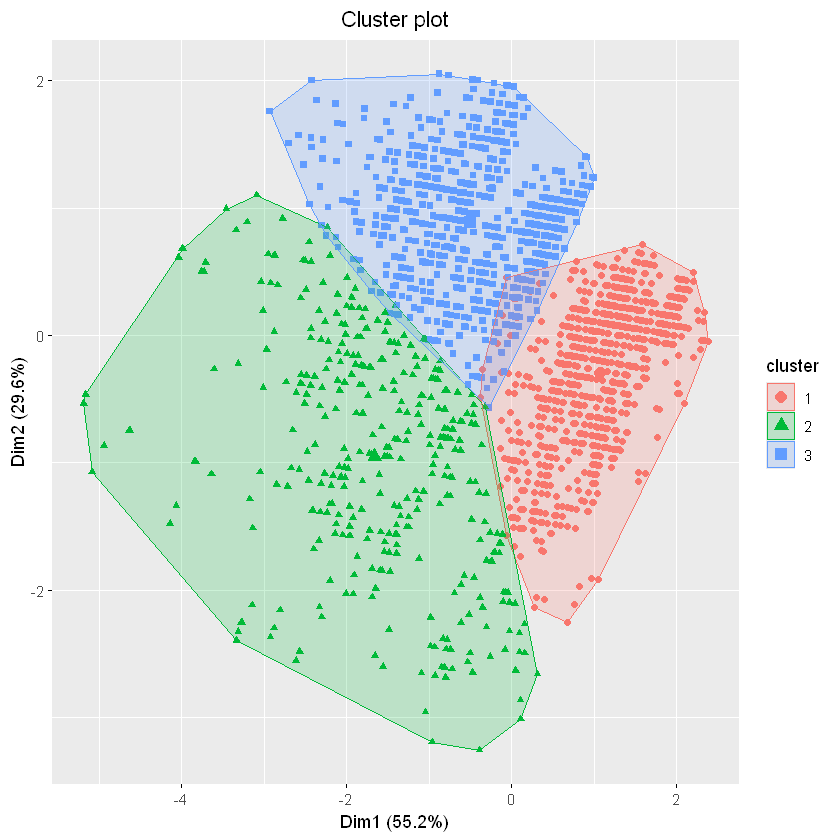

In [16]:
# Mostrar gráfico de dispersión 2D de los clústeres
fviz_cluster(kmeans_result, data = data_normalized, geom = "point")+
     theme(plot.title = element_text(hjust =0.5))

# 5. Evaluación de la Calidad del Clustering

  cluster size ave.sil.width
1       1  914          0.50
2       2  375          0.18
3       3  711          0.34


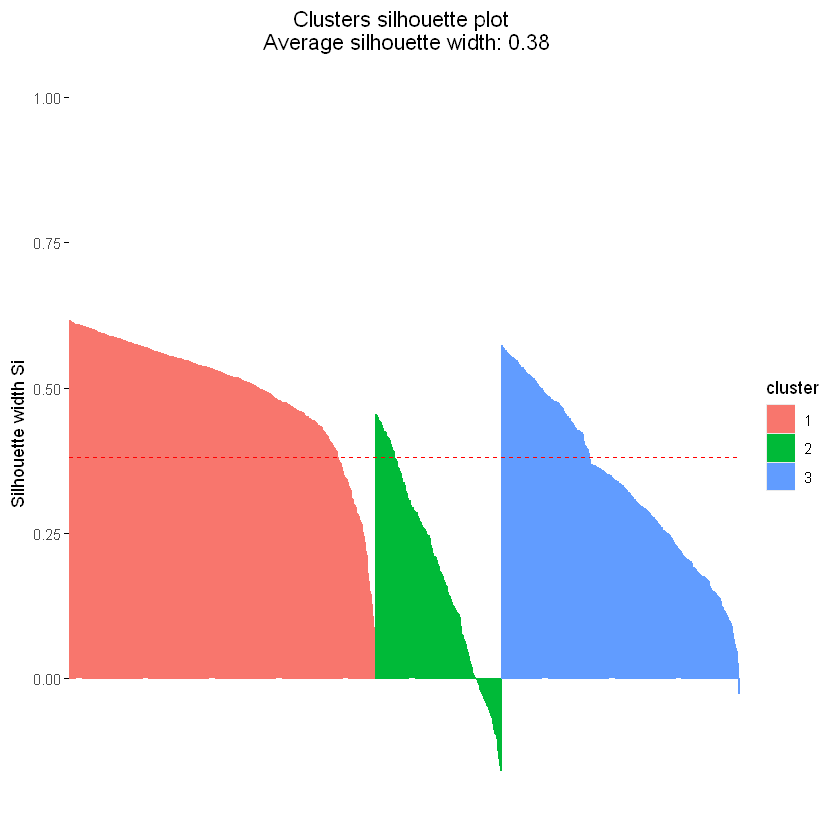

In [17]:
# Calcular distancias y coeficiente de Silhouette
dist_matrix <- dist(data_normalized)
sil <- silhouette(kmeans_result$cluster, dist_matrix)

# Mostrar el coeficiente de Silhouette
fviz_silhouette(sil)+ 
  theme(plot.title = element_text(hjust =0.5))

La mayoría de los puntos tienen un coeficiente de Silhouette positivo, lo que indica que están bien agrupados dentro de su clúster. Algunos puntos tienen un coeficiente de Silhouette negativo estos puntos podrían estar mal asignados a este clúster.

Los puntos con coeficiente negativo están más cerca de los puntos de otros clústeres que de los puntos de su propio clúster, lo que sugiere que este clúster podría no estar tan bien definido. Aún así, se indicaría que la muestra no es significativa donde se tiene un coeficiente negativo, por lo que es aceptable el agrupamiento realizado para la muestra de los datos.


# Conclusión

El proyecto se segmentó de manera efectiva a los clientes del supermercado utilizando tres variables clave: ingreso, edad y tamaño de ciudad. A través del análisis descriptivo, se identificó un patrón claro: la mayoría de los clientes son jóvenes adultos, con un ingreso promedio de 69,487. Esta información representa una excelente oportunidad para personalizar estrategias comerciales, optimizar campañas de marketing y diseñar ofertas específicas alineadas a las necesidades de cada segmento.

Para validar las relaciones entre las variables, se llevó a cabo un análisis de correlación que mostró que los ingresos más altos tienden a asociarse con personas de mayor edad. Además, se observó que los habitantes de ciudades grandes suelen percibir mayores ingresos. Con base en estos resultados, se aplicaron técnicas de clustering, como K-means, determinando el número óptimo de clústeres mediante el método del codo y el coeficiente de silhouette.

Segmentos identificados:

-   Rojo: Jóvenes con ingresos moderados, residentes en ciudades pequeñas.
-   Verde: Adultos mayores con ingresos altos, que viven en ciudades medianas.
-   Azul: Jóvenes con ingresos elevados, habitantes de la ciudad más grande.

El ingreso se destacó como la variable más determinante en la segmentación, facilitando la clasificación de los clientes según su poder adquisitivo. Esto es clave para adaptar las estrategias comerciales: clientes con ingresos altos suelen mostrar interés en productos premium, mientras que aquellos con ingresos más bajos podrían preferir opciones más accesibles.

Por otro lado, la edad también mostró diferencias significativas en los patrones de compra. Los clientes jóvenes tienden a agruparse en clústeres específicos, mientras que los mayores forman otros grupos, lo que permite personalizar las campañas según la etapa de vida de cada cliente y alinear productos y servicios con sus preferencias.

# Referencia

Dev Sharma. (2021). Customer clustering. <https://www.kaggle.com/datasets/dev0914sharma/customer-clustering/data>.
